# kNN算法 

#### k近邻法(k-nearest neighbor, k-NN)是1967年由Cover T和Hart P提出的一种基本分类与回归方法。
简单直观的理解：寻找k个最近的邻居，利用“物以类聚，人以群分”的思想，想认清一个人或是事物，可以从其朋友入手，所谓”观其友，而识其人“就是这个道理。 例如：   
![knn示例](img/knn.png)  
以上示例中，绿色的点是属于什么类别的？
* 若k=3，最近的3个邻居是2个红色小三角形和1个蓝色小正方形，少数从属于多数，基于统计的方法，判定这个待分类点属于红色的三角形一类。
* 若k=5，最近的5个邻居是2个红色三角形和3个蓝色的正方形，少数从属于多数，基于统计的方法，判定绿色的这个待分类点属于蓝色的正方形一类
* 当无法判定当前待分类点是从属于已知分类中的哪一类时，可以依据统计学的理论看它所处的位置特征，衡量它周围邻居的权重，而把它归为(或分配)到权重更大的那一类。这就是K近邻算法的核心思想。

#### 特别地，如果k=1,则为最近邻算法——寻找最近的那个邻居。

### k近邻算法的三要素
* 距离度量——如何度量近邻，如何计算？
* k值的选择——选多少个近邻？
* 分类决策规则——用什么方法决定分类？

#### 距离计算
k近邻算法的核心是找到实例点的邻居，邻居的度量标准常采用“距离度量法”，常见的距离度量：
* 欧氏距离（$L_2$范数）
$$dist=\sqrt{\sum_{k=1}^{n}(p_k-q_k)^2}$$
* 米科夫斯基距离
$$dist=(\sum_{k=1}^{n}|p_k-q_k|^r)^\frac{1}{r}$$
    * 当r=1，称为曼哈顿距离($L_1$范数)
    * 当r=2，称为欧氏距离
    * 当$r=\infty$，称为切比雪夫距离($L_\infty$)
    $$d(x,y)=\lim_{x \to \infty}{(\sum_{k=1}^{n}|x_k-y_k|^r)^\frac{1}{r}}$$
* 马氏距离
$$mahalanobis(p,q)=(p-q)\Sigma ^{-1}(p-q)^T$$
其中$\Sigma^{-1}$是协方差矩阵的逆。
* cos距离
$$cos(x,y)=\frac{x\cdot{y}}{\Vert{x}\Vert\Vert{y}\Vert}$$
* Jaccard相似系数
假设$p$和$q$, 都由$n$个二元属性组成
$$M_{01}=p取0并且q取1的属性的个数$$
$$M_{10}=p取1并且q取0的属性的个数$$
$$M_{00}=p取0并且q取0的属性的个数$$
$$M_{11}=p取1并且q取1的属性的个数$$
则，  
$$J=\frac{M_{11}}{M_{01}+M_{10}+M_{11}}$$
* 皮尔逊相关系数
$$corr(x,y)=\frac{s_{xy}}{s_xs_y}$$
其中$s_x$,$s_y$为标准差，$s_{xy}$：$$s_x=\sqrt{\frac{1}{n-1}\sum_{k=1}^{n}(x_k-\bar{x})^2}$$
$$s_y=\sqrt{\frac{1}{n-1}\sum_{k=1}^{n}(y_k-\bar{y})^2}$$
还有巴氏距离，汉明距离等，请参考百科等相关介绍。

#### k值的选择
* 选择较小的K值，用较小的领域中的训练实例进行预测，“学习”近似误差会减小，只有与输入实例较近或相似的训练实例才会对预测结果起作用，则 “学习”的估计误差会增大，k值的减小就意味着整体模型变得复杂，容易发生过拟合。（噪声干扰）
* 如果选择较大的k值，就相当于用较大领域中的训练实例进行预测，其优点是可以减少学习的估计误差，但缺点是学习的近似误差会增大。与输入实例较远（不相似的）训练实例也会对预测起作用，使预测发生错误，且K值的增大就意味着整体的模型变得简单。
* k=N，此时无论输入实例是什么，都只是简单的预测它属于在训练实例中最多的类，模型过于简单，忽略了训练实例中大量有用信息。
* 在实际应用中，k值一般取一个比较小的数值，可以采用交叉验证法来选择最优的k值。

#### 分类决策规则
* 一般采用多数表决法，即：输入实例的k个近邻的训练实例中的多数类决定输入实例的类。


示例：已知二维空间的3个点$x_1=(1,1)^T$,$x_2=(5,1)^T$,$x_3=(4,4)^T$，求在`p`取值不同下，$L_p$距离$x_1$的最近邻点。
$$dist=(\sum_{k=1}^{n}|p_k-q_k|^r)^\frac{1}{r}$$

解：$x_1$和$x_2$只有第二维值不同，因此$p$为任何值，
		       $$L_p(x_1,x_2)=4$$
       而：$$L_1(x_1,x_3)=6$$
              $$L_2(x_1,x_3)=4.24$$
              $$L_3(x_1,x_3)=3.78$$
              $$L_4(x_1,x_3)=3.57$$ 	
因此：  
    `p`等于`1`或`2`时候，$x_2$是$x_1$的最近邻点  
    `p`大于等于`3`，$x_3$是$x_1$的最近邻点


### 算法原理： 
存在一个带类标记的样本数据集合，对输入没有标签的新数据后，将新的数据的每个特征与样本集中数据对应的特征进行比较，利用能够算法提取样本最相似数据(最近邻)的分类标签。一般来说，kNN算法选择样本数据集中前k个最相似的数据，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。 

### 算法步骤：
Step 1:计算训练集中的点与当前点的距离  
Step 2:按照距离进行递增排序  
Step 3:选取与当前点距离最小的k个点  
Step 4:统计前k个点中每一类的频率  
Step 5:返回最大频率的类别即是新数据的类别  

### 一、简单k近邻算法实现

如何判断一部电影是动作片还是爱情片？我们分析动作片具有哪些共有特征，使得动作片之间类似，并且与爱情片有明显差异？例如：动作片中打斗场面比较多，而爱情片接吻场面比较多，但是动作片中也有接吻镜头，爱情片中也有打斗场景，因此不能简单的根据是否有打斗或亲吻来判断影片的类型。但是动作片中的打斗场面会更频繁一点，以此可以用来对电影进行分类。

<table id='id1' border='1px'>
    <tr>
        <td>电影名称</td>
        <td>打斗镜头</td>
        <td>亲吻镜头</td>
        <td>电影类型</td>
    </tr>
    <tr>
        <td>California Man</td>
        <td>3</td>
        <td>104</td>
        <td>爱情片</td>
    </tr>
    <tr>
        <td>He's Not Really into Dudes</td>
        <td>2</td>
        <td>100</td>
        <td>爱情片</td>
    </tr>
    <tr>
        <td>Beautiful Woman</td>
        <td>1</td>
        <td>81</td>
        <td>爱情片</td>
    </tr>
    <tr>
        <td>Kevin Longblade</td>
        <td>101</td>
        <td>10</td>
        <td>动作片</td>
    </tr>
    <tr>
        <td>Robo Slayer 3000</td>
        <td>99</td>
        <td>5</td>
        <td>动作片</td>
    </tr>
    <tr>
        <td>Amped II</td>
        <td>98</td>
        <td>2</td>
        <td>动作片</td>
    </tr>
    <tr>
        <td>???</td>
        <td>18</td>
        <td>90</td>
        <td>未知</td>
    </tr>
</table>

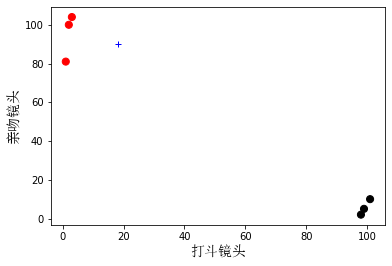

In [48]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
data = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
#font = FontProperties(fname="/usr/share/fonts/truetype/windows-font/simkai.ttf", size=14)
#windows
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
labelColor = ['red','red', 'red', 'black','black','black']
plt.xlabel('打斗镜头', FontProperties = font)
plt.ylabel('亲吻镜头', FontProperties = font)
plt.scatter(x = data[:,0], y = data[:,1], color = labelColor, s = 50, alpha = 1.0)
plt.plot(18,90, 'b+')
plt.show()

####  Step 1:准备数据集

In [49]:
import numpy as np
"""
Function Description：创建数据集

Parameters:
   无
Returns:
   data-数据集
   labels-数据对应的类别
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def createDs():
    data = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    labels = ['爱情片','爱情片','爱情片','动作片','动作片','动作片']
    return data,labels

In [50]:
data, labels = createDs()
print(data)
print(labels)

[[  3 104]
 [  2 100]
 [  1  81]
 [101  10]
 [ 99   5]
 [ 98   2]]
['爱情片', '爱情片', '爱情片', '动作片', '动作片', '动作片']


In [51]:
import operator
"""
Function Description：knn分类算法

Parameters:
   testVec--待分类的向量
   trainingSet--训练集
   labels--训练集对应的类标记集合
   k--距离最近的k个点
Returns:
   sortedCountOfLabel[0][0]--预测的类标记
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def classify(testVec, trainingSet, labels, k):
    #取得训练集的行数
    trainingSize = trainingSet.shape[0]
    
    #利用矩阵运算，求距离
    diffMatrix = np.tile(testVec, (trainingSize, 1)) - trainingSet
    
    #求平方
    sqMat = diffMatrix ** 2
    
    #按行相加，sum()
    sumMat = sqMat.sum(axis = 1)
    
    #计算距离
    distance = sumMat ** 0.5
    
    #对距离进行从小到大进行排序
    sortedDistance = distance.argsort()
    
    #定义一个记录类别次数的字典
    countOfLabel = {}
    
    for i in range(k):
        label = labels[sortedDistance[i]]
        #计算类别的次数
        countOfLabel[label] = countOfLabel.get(label, 0) + 1
    
    #对前k个类别次数降序排列字典
    sortedCountOfLabel = sorted(countOfLabel.items(), key = operator.itemgetter(1), reverse = True)
    
    #返回次数最多的类别
    return sortedCountOfLabel[0][0]

In [53]:
data, labels = createDs()
testData = [18, 90]
label = classify(testData, data, labels, 3)
print(label)

爱情片


### 二、k-近邻之约会对象匹配 

k-近邻算法的一般流程：  
1.收集数据：可以利用爬虫来收集数据、或者第三方提供的免费或收费的数据。数据一般存储在txt文件中，按一定的格式进行存放，便于数据解析和处理。  
2.数据预处理：利用python进行数据解析、对数据进行预处理。  
3.分析数据：可以使用很多方法对数据进行分析，例如可以使用Matplotlib对数据进行可视化。  
4.设计算法：设计k-近邻算法来进行计算，计算错误率。  
5.使用算法：错误率达到可接受的范围内，就可以应用k-近邻算法进行分类。  

#### 2.1 问题 
海伦女士一直使用在线约会网站寻找合适的约会对象，经过一段时间的使用，她将自己交往的人进行了归类：
<ul>
    <li>不喜欢的人</li>
    <li>魅力一般的人</li>
    <li>很有魅力的人</li>
</ul>
海伦收集了1000行数据(<a href='datingData.txt' target='_blank'>datingData</a>)，如下所示：

![约会数据](img/datingExam.png)

数据包含了3种特征：  
<ul>
    <li>每年飞行的里程数</li>
    <li>玩游戏所占时间的百分比</li>
    <li>每周消耗的冰激凌公升数</li>
</ul>

#### 2.2 数据准备之数据解析

在训练模型之前，首先要对数据进行解析，将数据处理成模型可以接受的格式。分类器需要两个部分的内容，一个是特征矩阵，一个是对应的分类标签。因此需要创建一个处理数据的函数来对数据进行格式化，将文本文件中的数据读入到数据矩阵中。

In [54]:
# -*- coding: utf-8 -*-
import numpy as np
"""
Function Description：读取数据文件，将数据转成Matrix

Parameters:
   filename--文件名称
Returns:
   dataMatrix--训练数据集
   labelVec--类别集
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def file2Matrix(filename):
    #打开文件
    f = open(filename,encoding='utf-8')
    
    lines = f.readlines()
    numberOfLines = len(lines)
    
    #定义需要返回numpy矩阵
    dataMatrix = np.zeros((numberOfLines, 3))
    
    #定义分类的标签向量
    labelVec = []
    
    index = 0
    
    for line in lines:
        #去掉末尾空白，"\n"、“\t”、“\r”等
        line = line.strip()
        #分给数据
        arr = line.split('\t')
        
        dataMatrix[index,:] = arr[0:3]
        
        #处理标签，用数字表示，1表示不喜欢，2表示一般魅力，3表示很有魅力
        
        if arr[-1] == '不喜欢':
            labelVec.append(1)
        elif arr[-1] == '一般魅力':
            labelVec.append(2)
        elif arr[-1] == '很有魅力':
            labelVec.append(3)
        index += 1
    
    return dataMatrix, labelVec

In [55]:
filename = 'data/datingData.txt'
dataMatrix, labelVec = file2Matrix(filename)
print(dataMatrix[0:5])
print(labelVec[0:5])

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 [7.5136000e+04 1.3147394e+01 4.2896400e-01]
 [3.8344000e+04 1.6697880e+00 1.3429600e-01]]
[3, 2, 1, 1, 1]


#### 2.3 分析数据：数据可视化

可以对数据进行可视化，更直观的查看数据

In [56]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

"""
Function Description：画训练数据的散列图

Parameters:
   dataMatrix--数据集
   labelVec--类别的集合
Returns:
    无
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def plotData(dataMatrix, labelVec):
    #设置汉字的显示格式,如果是windows平台，到C:\windows\fonts下面找字体
    #font = FontProperties(fname="/usr/share/fonts/truetype/windows-font/simkai.ttf", size=14)
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将画布分割成2行2列(分成四块),不共享x和y轴，画布大小为(13,8)
    fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex = False, sharey = False, figsize=(13, 8))
    
    numberOfLabels = len(labelVec)
    #定义类标记的颜色
    labelColor = []
    
    for i  in labelVec:
        if i == 1:
            labelColor.append('black')
        if i == 2:
            labelColor.append('orange')
        if i == 3:
            labelColor.append('red')
    
    #画散点图:画第一个特征，第二个特征，散点大小为15，透明度为0.5
    axs[0][0].scatter(x = dataMatrix[:,0], y = dataMatrix[:, 1], color = labelColor, s = 15, alpha = .5)
    #设置标题，x轴，y轴
    axs0_title_text = axs[0][0].set_title('每年的飞行里程数与玩游戏所占时间比', FontProperties = font)
    axs0_xlabel_text = axs[0][0].set_xlabel('每年的飞行里程数', FontProperties = font)
    axs0_ylabel_text = axs[0][0].set_ylabel('玩游戏所占时间比', FontProperties = font)
    plt.setp(axs0_title_text, size = 9, weight = 'bold', color = 'blue')
    plt.setp(axs0_xlabel_text, size = 7, weight = 'bold', color = 'black')
    plt.setp(axs0_ylabel_text, size = 7, weight = 'bold', color = 'black')
    
    #画第二张图：第一个特征和第三个特征
    axs[0][1].scatter(x = dataMatrix[:,0], y = dataMatrix[:,2], color = labelColor, s = 15, alpha= .5)
    #设置标题，x轴，y轴
    axs1_title_text = axs[0][1].set_title('每年的飞行里程数与每周消耗的冰激凌公升数', FontProperties = font)
    axs1_xlabel_text = axs[0][1].set_xlabel('每年的飞行里程数：', FontProperties = font)
    axs1_ylabel_text = axs[0][1].set_ylabel('每周消耗的冰激凌公升数：', FontProperties = font)
    plt.setp(axs1_title_text, size = 9, weight = 'bold', color = 'blue')
    plt.setp(axs1_xlabel_text, size = 7, weight = 'bold', color = 'black')
    plt.setp(axs1_ylabel_text, size = 7, weight = 'bold', color = 'black')
    
    #画第三张图：第二个特征和第第三个特征
    axs[1][0].scatter(x = dataMatrix[:,1], y = dataMatrix[:,2], color = labelColor, s = 15, alpha= .5)
    #设置标题，x轴，y轴
    axs2_title_text = axs[1][0].set_title('玩游戏所占时间比与每周消耗的冰激凌公升数', FontProperties = font)
    axs2_xlabel_text = axs[1][0].set_xlabel('玩游戏所占时间比：', FontProperties = font)
    axs2_ylabel_text = axs[1][0].set_ylabel('每周消耗的冰激凌公升数：', FontProperties = font)
    plt.setp(axs2_title_text, size = 9, weight = 'bold', color = 'blue')
    plt.setp(axs2_xlabel_text, size = 7, weight = 'bold', color = 'black')
    plt.setp(axs2_ylabel_text, size = 7, weight = 'bold', color = 'black')
    
    #设置图例
    unLike = mlines.Line2D([], [], color = 'black', marker = '.', markersize = 6, label = u'不喜欢')
    sDoses = mlines.Line2D([], [], color = 'orange', marker = '.', markersize = 6, label = u'一般魅力')
    lDoses = mlines.Line2D([], [], color = 'red', marker = '.', markersize = 6, label = u'很有魅力')
    #添加图例到图中
    #font = FontProperties(fname="/usr/share/fonts/truetype/windows-font/simkai.ttf", size=6)
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=6)
    axs[0][0].legend(handles = [unLike, sDoses, lDoses], prop = font)
    axs[0][1].legend(handles = [unLike, sDoses, lDoses], prop = font)
    axs[1][0].legend(handles = [unLike, sDoses, lDoses], prop = font)
    
    #在画布上显示图片
    plt.show()

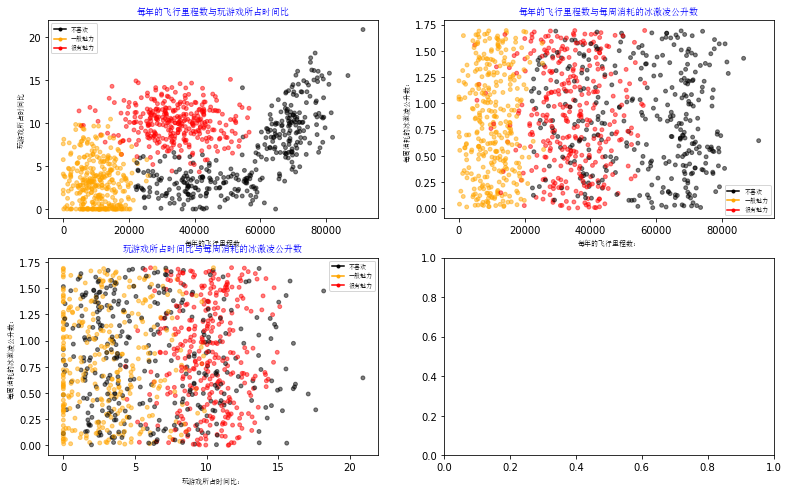

In [57]:
plotData(dataMatrix, labelVec)

通过可视化可以发现数据的规律，比如说：每年飞行的里程数与玩游戏占的时间比这量为特征的图（图1），通过图查看，有一定的里程数，并且玩游戏所占的时间较高，蕴含中可能生活质量高，生活比较悠闲。而太多的飞行里程数，可能工作出差比较多。

#### 2.4 数据归一化
值较大的特征对距离的计算影响比较大，比如上例中，里程数对距离的计算结果的影响远远大于其它两个特征，而三个特征同等重要的话，因此需要对特征进行归一化操作，比如将取值范围处理为[0,1]或[-1,1]中，相关的内容可以参考《第二章 数据》相关内容。  
可以利用如下公式来进行归一化：  
$newValue = \frac{oldValue - min}{max - min}$  
其中max，min分别是当前数据集该特征的最大值和最小值。

In [58]:
"""
Function Description：数据归一化

Parameters:
   dataSet--数据集
Returns:
   normDs--归一化后的数据集
   ranges--最大值与最小值的范围
   minValue--最小值
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def norm(dataSet):
    #每一列的最小值
    minValue = dataSet.min(0)
    #每一列的最大值
    maxValue = dataSet.max(0)
    
    #最大值与最小值的范围
    ranges = maxValue - minValue
    
    normDs = np.zeros(np.shape(dataSet))
    
    m = dataSet.shape[0]
    #原始值减去最小值
    normDs = dataSet - np.tile(minValue, (m, 1))
    #归一化操作
    normDs = normDs / np.tile(ranges, (m, 1))
    
    return normDs, ranges, minValue

In [59]:
normDs, ranges, minValue = norm(dataMatrix)
print(normDs[0:5])
print(ranges)
print(minValue)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 [0.82320073 0.62848007 0.25248929]
 [0.42010233 0.07982027 0.0785783 ]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


#### 2.5 测试算法：验证分类器  
评估算法准确率是机器学习和数据挖掘一个重要的工作，可以对训练集进行划分：利用90%的训练样本训练模型，10%的样本用于测试分类器（数据应该随机抽取），检验分类器的准确率。

In [60]:
"""
Function Description：knn分类算法，分类器

Parameters:
   testVec--待分类的向量
   trainingSet--训练集
   labels--训练集对应的类标记集合
   k--距离最近的k个点
Returns:
   sortedCountOfLabel[0][0]--预测的类标记
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def classify(testVec, trainingSet, labels, k):
    #取得训练集的行数
    trainingSize = trainingSet.shape[0]
    
    #利用矩阵运算，求距离
    diffMatrix = np.tile(testVec, (trainingSize, 1)) - trainingSet
    
    #求平方
    sqMat = diffMatrix ** 2
    
    #按行相加，sum()
    sumMat = sqMat.sum(axis = 1)
    
    #计算距离
    distance = sumMat ** 0.5
    
    #对距离进行从小到大进行排序
    sortedDistance = distance.argsort()
    
    #定义一个记录类别次数的字典
    countOfLabel = {}
    
    for i in range(k):
        label = labels[sortedDistance[i]]
        #计算类别的次数
        countOfLabel[label] = countOfLabel.get(label, 0) + 1
    
    #对前k个类别次数降序排列字典
    sortedCountOfLabel = sorted(countOfLabel.items(), key = operator.itemgetter(1), reverse = True)
    
    #返回次数最多的类别
    return sortedCountOfLabel[0][0]
    

In [61]:
"""
Function Description：测试算法，训练集的90%作为训练，10%作为测试集验证算法

Parameters:
    无
Returns:
    无
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def datingTest():
    fileName = "data/datingData.txt"
    dataMatrix, labels = file2Matrix(fileName)
    
    #取训练集合的10%
    ratio = 0.10
    
    #数据归一化
    normMatrix, ranges, minValues = norm(dataMatrix)
    
    #获得行数
    dataSize = normMatrix.shape[0]
    
    #测试集的需取的行数
    numOfTestData = int(dataSize * ratio)
    
    #错误计数
    errorCount = 0.0
    
    #normMatrix中前numOfTestData个数据作为测试集,后面的dataSize-numOfTestData个数据作为训练集进行训练，k=4
    for i in range(numOfTestData):
        #可以试试取不同的k,来看看算法效果
        result = classify(normMatrix[i,:], normMatrix[numOfTestData:dataSize,:], labels[numOfTestData:dataSize], 4)
        
        print("分类结果：%d\t真实类别为：%d" % (result, labels[i]))
        
        if result != labels[i]:
            errorCount += 1.0
    print("分类错误率为：%f%%" %(errorCount/float(numOfTestData)*100))

In [62]:
datingTest()

分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：3	真实类别为：3
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：3	真实类别为：3
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：3	真实类别为：3
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：3	真实类别为：3
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：1	真实类别为：1
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：2	真实类别为：2
分类结果：3	真实类

#### <font color='red'>动动手：可以通过调整测试集的比例和分类器k的值，来看看错误率的变换。</font>

#### 2.6 使用算法：构建完整的可用系统 

通过输入一个人的信息，程序预测结果。

In [63]:
"""
Function Description：利用kNN分类预测

Parameters:
    无
Returns:
    无
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def classifyPerson():
    #输出结果
    resultLst = ['讨厌', '有些喜欢', '非常喜欢']
    
    #输入特征
    miles = float(input("每年飞行的里程数："))
    gamePercent = float(input('玩游戏所占的时间百分比：'))
    iceCount = float(input('每周消耗的冰激凌公升数：'))
    
    #打开训练集
    filename = 'data/datingData.txt'
    
    dataMatrix, labels = file2Matrix(filename)
    
    #归一化
    normMatrix, ranges, minValues = norm(dataMatrix)
    
    #生成numpy数组， 构造测试集
    arr = np.array([miles, gamePercent, iceCount])
    
    #测试集归一化
    normTestVec = (arr - minValues) / ranges
    
    #返回结果
    
    result = classify(normTestVec, normMatrix, labels, 4)
    
    #打印结果
    
    print("你可能%s这个人" % (resultLst[result - 1]))

In [64]:
classifyPerson()

每年飞行的里程数：1000
玩游戏所占的时间百分比：20
每周消耗的冰激凌公升数：10
你可能有些喜欢这个人


### 三、手写数字识别 

利用k近邻分类器构建一简单的手写识别系统，只识别0~9，构建步骤如下：  
1.收集数据：将图片转换成文本文件  
2.准备数据：编写函数img2vector()，将图像格式转换为分类器使用的向量格式  
3.分析数据：检查数据，确保符合算法要求  
4.测试算法：将部分数据作为测试集，其它作为训练接，来测试算法的错误率  
5.使用算法：使用算法来实现手写数字识别。  

####  准备数据：将图像转换为测试向量
将图像进行格式化处理，转换成一个向量，将一个$32*32$的二进制图像矩阵转换成$1*1024$的向量。  
设计一个函数来读取每一个图片文件，将每行的前32个字符读出来存储在Numpy数组中。

In [42]:
"""
Function Description：将32*32的图片读成向量格式

Parameters:
    filename--文件名称
Returns:
    vect--向量
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def img2vector(filename):
    #初始化一个1*1024的向量
    vect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        line = fr.readline()
        #每一行取出来依次放入向量中 
        for j in range(32):
            vect[0,32 * i + j] = int(line[j])
    return vect

In [43]:
testVector = img2vector('data/trainingDigits/0_0.txt')
testVector[0,0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 测试算法：使用k-近邻算法识别手写数字

In [46]:
from os import listdir
"""
Function Description：利用kNN算法实现对手写数字的识别，建立模型，对测试集进行预测

Parameters:
    无
Returns:
    无
Author:
   Double Liang
Create Date:
    2018-03-20
Version:
    V1.0
"""
def handwritingClassTest():
    #训练集数据的类别集合
    labels = []
    #训练集中的文件，每一个文件是一幅手写数字图像转换的像素，分别用0和1表示
    trainingFileLst = listdir('data/trainingDigits')
    #训练集的大小
    m = len(trainingFileLst)
    #初始化训练集矩阵
    trainingMatrix = np.zeros((m, 1024))
    #读取每一个文件
    for i in range(m):
        
        fileName = trainingFileLst[i]
        #文件名称示例： 6_56.txt，其中“_”前面的是这幅图片的类别。
        fileStr = fileName.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        labels.append(classNumStr)
        #将文件32*32的图像数据读成1*1024向量
        trainingMatrix[i,:] = img2vector('data/trainingDigits/%s' % fileName)
    
    #读取测试集合
    testFileLst = listdir('data/testDigits/')
    errorCount = 0.0
    
    mTest = len(testFileLst)
    
    for i in range(mTest):
        #取得测试集的类标记，并且读成向量
        fileNameStr = testFileLst[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('data/testDigits/%s' % fileNameStr)
        #调用分类器，进行预测分类
        classifierResult = classify(vectorUnderTest, trainingMatrix, labels, 3)
        print("%11s:分类器预测结果:%d, 真实结果 :%d" %(fileNameStr,classifierResult, classNumStr))
        
        if classifierResult != classNumStr:
            errorCount += 1.0
    
    print("\n错误个数 :%d" % errorCount)
    print("\n错误率:%f" % (errorCount/float(mTest)))

In [47]:
handwritingClassTest()

    0_0.txt:分类器预测结果:0, 真实结果 :0
    0_1.txt:分类器预测结果:0, 真实结果 :0
   0_10.txt:分类器预测结果:0, 真实结果 :0
   0_11.txt:分类器预测结果:0, 真实结果 :0
   0_12.txt:分类器预测结果:0, 真实结果 :0
   0_13.txt:分类器预测结果:0, 真实结果 :0
   0_14.txt:分类器预测结果:0, 真实结果 :0
   0_15.txt:分类器预测结果:0, 真实结果 :0
   0_16.txt:分类器预测结果:0, 真实结果 :0
   0_17.txt:分类器预测结果:0, 真实结果 :0
   0_18.txt:分类器预测结果:0, 真实结果 :0
   0_19.txt:分类器预测结果:0, 真实结果 :0
    0_2.txt:分类器预测结果:0, 真实结果 :0
   0_20.txt:分类器预测结果:0, 真实结果 :0
   0_21.txt:分类器预测结果:0, 真实结果 :0
   0_22.txt:分类器预测结果:0, 真实结果 :0
   0_23.txt:分类器预测结果:0, 真实结果 :0
   0_24.txt:分类器预测结果:0, 真实结果 :0
   0_25.txt:分类器预测结果:0, 真实结果 :0
   0_26.txt:分类器预测结果:0, 真实结果 :0
   0_27.txt:分类器预测结果:0, 真实结果 :0
   0_28.txt:分类器预测结果:0, 真实结果 :0
   0_29.txt:分类器预测结果:0, 真实结果 :0
    0_3.txt:分类器预测结果:0, 真实结果 :0
   0_30.txt:分类器预测结果:0, 真实结果 :0
   0_31.txt:分类器预测结果:0, 真实结果 :0
   0_32.txt:分类器预测结果:0, 真实结果 :0
   0_33.txt:分类器预测结果:0, 真实结果 :0
   0_34.txt:分类器预测结果:0, 真实结果 :0
   0_35.txt:分类器预测结果:0, 真实结果 :0
   0_36.txt:分类器预测结果:0, 真实结果 :0
   0_37.txt:分类器预测结果:0, 真实结果 :0
   0_38.

   2_83.txt:分类器预测结果:2, 真实结果 :2
   2_84.txt:分类器预测结果:2, 真实结果 :2
   2_85.txt:分类器预测结果:2, 真实结果 :2
   2_86.txt:分类器预测结果:2, 真实结果 :2
   2_87.txt:分类器预测结果:2, 真实结果 :2
   2_88.txt:分类器预测结果:2, 真实结果 :2
   2_89.txt:分类器预测结果:2, 真实结果 :2
    2_9.txt:分类器预测结果:2, 真实结果 :2
   2_90.txt:分类器预测结果:2, 真实结果 :2
   2_91.txt:分类器预测结果:2, 真实结果 :2
    3_0.txt:分类器预测结果:3, 真实结果 :3
    3_1.txt:分类器预测结果:3, 真实结果 :3
   3_10.txt:分类器预测结果:3, 真实结果 :3
   3_11.txt:分类器预测结果:9, 真实结果 :3
   3_12.txt:分类器预测结果:3, 真实结果 :3
   3_13.txt:分类器预测结果:3, 真实结果 :3
   3_14.txt:分类器预测结果:3, 真实结果 :3
   3_15.txt:分类器预测结果:3, 真实结果 :3
   3_16.txt:分类器预测结果:3, 真实结果 :3
   3_17.txt:分类器预测结果:3, 真实结果 :3
   3_18.txt:分类器预测结果:3, 真实结果 :3
   3_19.txt:分类器预测结果:3, 真实结果 :3
    3_2.txt:分类器预测结果:3, 真实结果 :3
   3_20.txt:分类器预测结果:3, 真实结果 :3
   3_21.txt:分类器预测结果:3, 真实结果 :3
   3_22.txt:分类器预测结果:3, 真实结果 :3
   3_23.txt:分类器预测结果:3, 真实结果 :3
   3_24.txt:分类器预测结果:3, 真实结果 :3
   3_25.txt:分类器预测结果:3, 真实结果 :3
   3_26.txt:分类器预测结果:3, 真实结果 :3
   3_27.txt:分类器预测结果:3, 真实结果 :3
   3_28.txt:分类器预测结果:3, 真实结果 :3
   3_29.

   5_53.txt:分类器预测结果:5, 真实结果 :5
   5_54.txt:分类器预测结果:5, 真实结果 :5
   5_55.txt:分类器预测结果:5, 真实结果 :5
   5_56.txt:分类器预测结果:5, 真实结果 :5
   5_57.txt:分类器预测结果:5, 真实结果 :5
   5_58.txt:分类器预测结果:5, 真实结果 :5
   5_59.txt:分类器预测结果:5, 真实结果 :5
    5_6.txt:分类器预测结果:5, 真实结果 :5
   5_60.txt:分类器预测结果:5, 真实结果 :5
   5_61.txt:分类器预测结果:5, 真实结果 :5
   5_62.txt:分类器预测结果:5, 真实结果 :5
   5_63.txt:分类器预测结果:5, 真实结果 :5
   5_64.txt:分类器预测结果:5, 真实结果 :5
   5_65.txt:分类器预测结果:5, 真实结果 :5
   5_66.txt:分类器预测结果:5, 真实结果 :5
   5_67.txt:分类器预测结果:5, 真实结果 :5
   5_68.txt:分类器预测结果:5, 真实结果 :5
   5_69.txt:分类器预测结果:5, 真实结果 :5
    5_7.txt:分类器预测结果:5, 真实结果 :5
   5_70.txt:分类器预测结果:5, 真实结果 :5
   5_71.txt:分类器预测结果:5, 真实结果 :5
   5_72.txt:分类器预测结果:5, 真实结果 :5
   5_73.txt:分类器预测结果:5, 真实结果 :5
   5_74.txt:分类器预测结果:5, 真实结果 :5
   5_75.txt:分类器预测结果:5, 真实结果 :5
   5_76.txt:分类器预测结果:5, 真实结果 :5
   5_77.txt:分类器预测结果:5, 真实结果 :5
   5_78.txt:分类器预测结果:5, 真实结果 :5
   5_79.txt:分类器预测结果:5, 真实结果 :5
    5_8.txt:分类器预测结果:5, 真实结果 :5
   5_80.txt:分类器预测结果:5, 真实结果 :5
   5_81.txt:分类器预测结果:5, 真实结果 :5
   5_82.

    8_4.txt:分类器预测结果:8, 真实结果 :8
   8_40.txt:分类器预测结果:8, 真实结果 :8
   8_41.txt:分类器预测结果:8, 真实结果 :8
   8_42.txt:分类器预测结果:8, 真实结果 :8
   8_43.txt:分类器预测结果:8, 真实结果 :8
   8_44.txt:分类器预测结果:8, 真实结果 :8
   8_45.txt:分类器预测结果:1, 真实结果 :8
   8_46.txt:分类器预测结果:8, 真实结果 :8
   8_47.txt:分类器预测结果:8, 真实结果 :8
   8_48.txt:分类器预测结果:8, 真实结果 :8
   8_49.txt:分类器预测结果:8, 真实结果 :8
    8_5.txt:分类器预测结果:8, 真实结果 :8
   8_50.txt:分类器预测结果:8, 真实结果 :8
   8_51.txt:分类器预测结果:8, 真实结果 :8
   8_52.txt:分类器预测结果:8, 真实结果 :8
   8_53.txt:分类器预测结果:8, 真实结果 :8
   8_54.txt:分类器预测结果:8, 真实结果 :8
   8_55.txt:分类器预测结果:8, 真实结果 :8
   8_56.txt:分类器预测结果:8, 真实结果 :8
   8_57.txt:分类器预测结果:8, 真实结果 :8
   8_58.txt:分类器预测结果:8, 真实结果 :8
   8_59.txt:分类器预测结果:8, 真实结果 :8
    8_6.txt:分类器预测结果:8, 真实结果 :8
   8_60.txt:分类器预测结果:8, 真实结果 :8
   8_61.txt:分类器预测结果:8, 真实结果 :8
   8_62.txt:分类器预测结果:8, 真实结果 :8
   8_63.txt:分类器预测结果:8, 真实结果 :8
   8_64.txt:分类器预测结果:8, 真实结果 :8
   8_65.txt:分类器预测结果:8, 真实结果 :8
   8_66.txt:分类器预测结果:8, 真实结果 :8
   8_67.txt:分类器预测结果:8, 真实结果 :8
   8_68.txt:分类器预测结果:8, 真实结果 :8
   8_69.

### 四、动手实践

1、 Step by Step 实现kNN算法  
2、 利用sklearn等机器学习包实现

## <div align="center"><font color='red'>操千曲而后晓声，观千剑而后识器</font></div>

### 五、想一想

1、kNN 与 决策树 的区别？  
2、kNN的应用场景